In [7]:
from PIL import Image
import random
import math
import numpy as np
import pandas as pd
from tifffile import imwrite
import rasterio as rio
from mlib import *


In [2]:
files_array = ['RelabDatabase2020Dec31/data/cmp/pl/bkr1pl144d.txt',
       'RelabDatabase2020Dec31/data/plh/cy/c1cy24.txt',
       'RelabDatabase2020Dec31/data/jrj/jj/bkr3jj007.txt',
       'RelabDatabase2020Dec31/data/rvm/io/c1io01.txt',
       'RelabDatabase2020Dec31/data/cmp/rs/cdrs78.txt',
       'RelabDatabase2020Dec31/data/eac/mg/lamg10.txt',
       'RelabDatabase2020Dec31/data/eac/sc/c1sc20.txt',
       'RelabDatabase2020Dec31/data/eac/gn/cagn04.txt',
       'RelabDatabase2020Dec31/data/dwm/nf/ncnf04.txt',
       'RelabDatabase2020Dec31/data/txh/mb/cimb43.txt',
       'RelabDatabase2020Dec31/data/eac/ec/laec06.txt',
       'RelabDatabase2020Dec31/data/eac/sc/c1sc13.txt',
       'RelabDatabase2020Dec31/data/txh/mt/bkr1mt022.txt',
       'RelabDatabase2020Dec31/data/jlb/jb/bkr1jb593.txt',
       'RelabDatabase2020Dec31/data/jrj/jj/bkr3jj052.txt',
       'RelabDatabase2020Dec31/data/cmp/rk/cbrk87.txt',
       'RelabDatabase2020Dec31/data/jlb/jb/397f212d.txt',
       'RelabDatabase2020Dec31/data/rgb/sb/c1sb01.txt',
       'RelabDatabase2020Dec31/data/awb/mt/bkr1mt239.txt',
       'RelabDatabase2020Dec31/data/a1w/mt/bkr1mt185g2.txt',
       'RelabDatabase2020Dec31/data/rgb/pt/c1pt22.txt',
       'RelabDatabase2020Dec31/data/jlb/jb/bkr1jbe58c.txt',
       'RelabDatabase2020Dec31/data/eac/pp/c1pp63.txt',
       'RelabDatabase2020Dec31/data/jlb/jb/bkr2jba82f.txt',
       'RelabDatabase2020Dec31/data/jba/ls/cls341.txt']

In [3]:
from utils import get_weighted_sums_from_txt_file

normalized_df = pd.read_pickle('normalized_df.pkl')
CONFIG = {
    'start_wavelength':300,
    'end_wavelength':3000,
    'start_threshold':50,
    'end_threshold':500,
    'ignore_limits':False
}

ws_arr = [get_weighted_sums_from_txt_file(x,normalized_df,CONFIG)[1] for x in files_array]

In [4]:
def voronoi(width, height, num_cells, materials_array):
    img = np.zeros((width,height,13))
    imgx, imgy = width, height

    nx = []
    ny = []
    mat_choice = []
    
    for i in range(num_cells):
        # Append random points
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        
        # Append their corresponding rgb values
        mat_choice.append(materials_array[random.randrange(len(materials_array))])

    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            img[x][y] = mat_choice[j]

    return img
    

In [20]:
fn = 'vor5.tiff'
voronoiV2(1000,1000,15,ws_arr,filename=fn)

/Users/bimajenie/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/rasterio/__init__.py:207: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<Figure size 432x288 with 0 Axes>

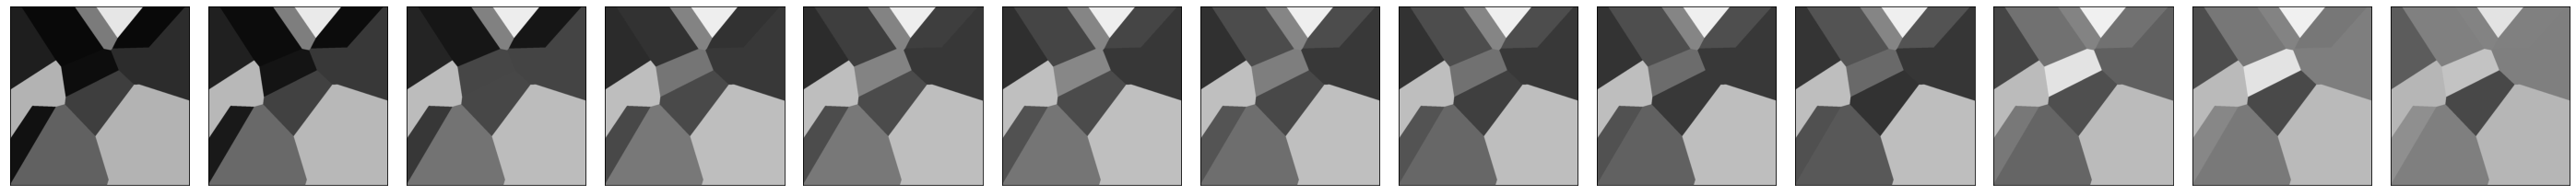

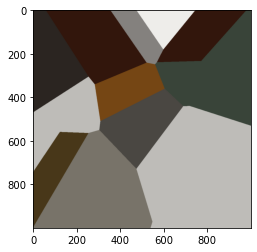

In [21]:

smp = rio.open(fn).read()

bands=[]
for i in range(13):
    bands.append(mcv.imshow(smp, multiply=1, channel_first=True, bands=i, ret=True, show=False))
    
mcv.batch_show(bands)
mcv.imshow(smp, multiply=1, channel_first=True)